#  1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


# 2. Load the Dataset

In [2]:
df = pd.read_csv("./data/MFA_Fraud_Analysis_Synthetic.csv")
df.head()

,mfa_type,attack_type,user_error,fraud_occurred,transaction_successful
0,Authenticator App,Phishing,Clicked malicious link,True,True
1,Authenticator App,Social Engineering,Gave code,True,True
2,SMS,Phishing,Clicked malicious link,False,False
3,SMS,SIM Swap,Shared OTP,True,True
4,Authenticator App,Social Engineering,Gave code,True,True


# 3. Basic Summary and Shape

In [3]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   mfa_type                265 non-null    object
 1   attack_type             300 non-null    object
 2   user_error              205 non-null    object
 3   fraud_occurred          300 non-null    bool  
 4   transaction_successful  300 non-null    bool  
dtypes: bool(2), object(3)
memory usage: 7.7+ KB


mfa_type                  35
attack_type                0
user_error                95
fraud_occurred             0
transaction_successful     0
dtype: int64

# 4. Distribution of MFA Types

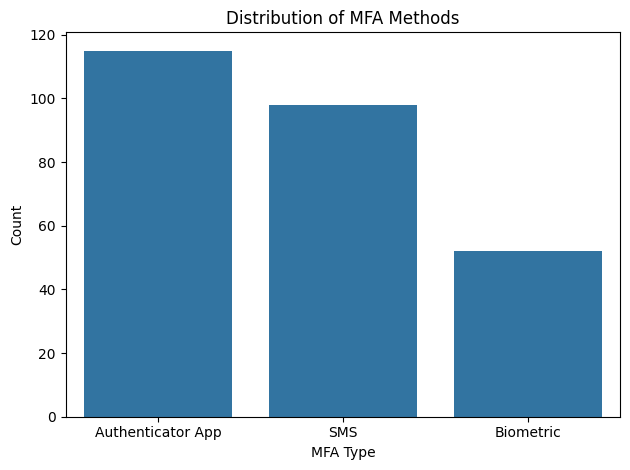

In [4]:
sns.countplot(data=df, x='mfa_type')
plt.title('Distribution of MFA Methods')
plt.xlabel('MFA Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# 5. Fraud Occurrence by MFA Type

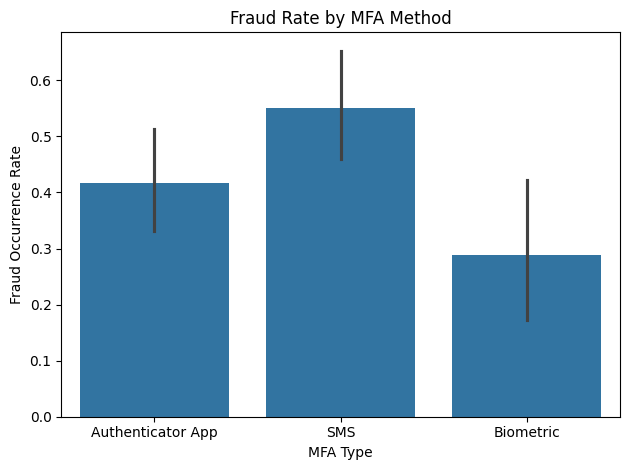

In [6]:
sns.barplot(data=df, x='mfa_type', y=df['fraud_occurred'].astype(int))
plt.title('Fraud Rate by MFA Method')
plt.xlabel('MFA Type')
plt.ylabel('Fraud Occurrence Rate')
plt.tight_layout()
plt.show()

# Attack Type vs Fraud Rate

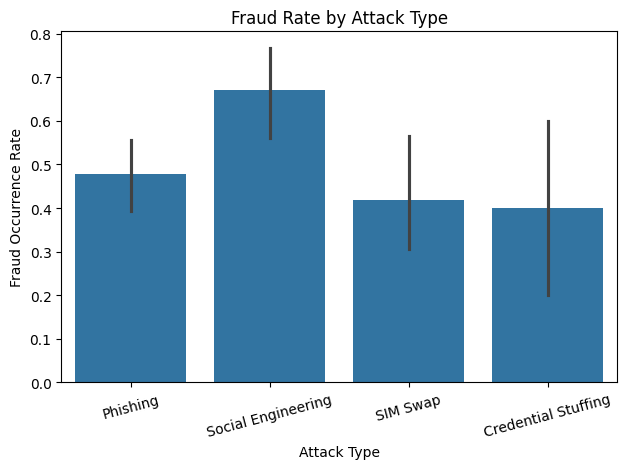

In [7]:
sns.barplot(data=df, x='attack_type', y=df['fraud_occurred'].astype(int))
plt.title('Fraud Rate by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Fraud Occurrence Rate')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


# User Error vs Fraud

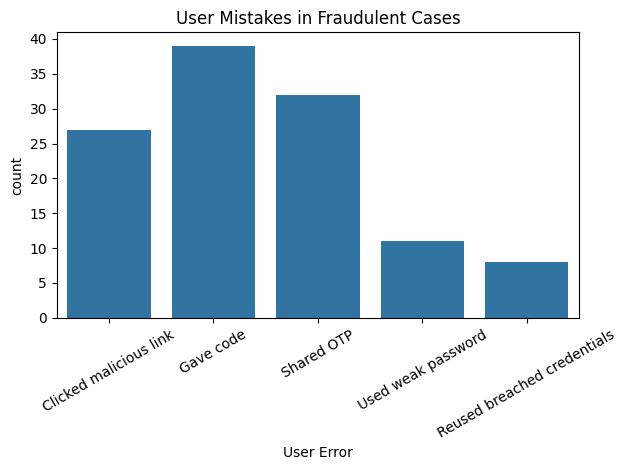

In [8]:
sns.countplot(data=df[df['fraud_occurred'] == True], x='user_error')
plt.title('User Mistakes in Fraudulent Cases')
plt.xlabel('User Error')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


# Chi-Square Test: MFA vs Fraud Occurrence

In [9]:
ct = pd.crosstab(df['mfa_type'], df['fraud_occurred'])
chi2, p, dof, expected = chi2_contingency(ct)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)

if p < 0.05:
    print("Conclusion: Reject the null hypothesis – MFA type affects fraud occurrence.")
else:
    print("Conclusion: Fail to reject the null – No strong link between MFA type and fraud.")


Chi-Square Statistic: 9.977351731860804
Degrees of Freedom: 2
P-Value: 0.006814682073376603
Conclusion: Reject the null hypothesis – MFA type affects fraud occurrence.


# Fraud Success Rate (Transaction Passed)

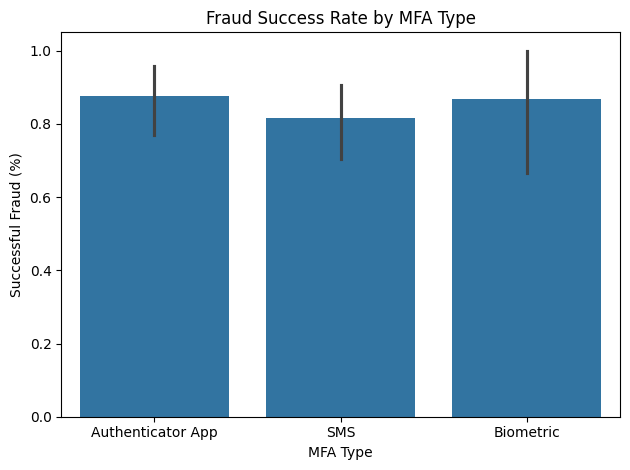

In [10]:
sns.barplot(data=df[df['fraud_occurred'] == True], x='mfa_type', y=df['transaction_successful'].astype(int))
plt.title('Fraud Success Rate by MFA Type')
plt.ylabel('Successful Fraud (%)')
plt.xlabel('MFA Type')
plt.tight_layout()
plt.show()


##  Conclusion: MFA Effectiveness and Fraud Risk Analysis

This section analyzes why fraud still occurs despite multi-factor authentication (MFA), based on 300 simulated events using real-world attack patterns and vulnerabilities.

###  Key Findings

- **Distribution of MFA Methods**:  
  - Authenticator Apps: 115 cases  
  - SMS: 98 cases  
  - Biometric: 52 cases  

- **Fraud Occurrence Rate by MFA Type**:
  - SMS MFA had the **highest fraud rate (~56%)**, largely due to vulnerability to phishing and SIM swap attacks.
  - Authenticator Apps had a **moderate fraud rate (~42%)**, often exploited through social engineering.
  - Biometric MFA had the **lowest fraud rate (~29%)**, indicating better resilience but not immunity.

- **Attack Method vs Fraud Rate**:
  - Social Engineering attacks led to the **highest fraud occurrence (~68%)**.
  - Phishing and SIM Swaps also contributed significantly, showing that most fraud stems from user deception or telecom exploits.

- **User Mistakes in Fraudulent Cases**:
  - 39 users gave away codes due to deception.
  - 27 users clicked phishing links.
  - Others reused credentials or used weak passwords.
  - These patterns show that fraud exploits human behavior more than technical flaws.

- **Fraud Success Rate**:
  - When fraud occurred, over **85% of those transactions were processed** successfully—indicating poor interception capabilities regardless of MFA type.

###  Statistical Insight

A **Chi-Square test** comparing MFA types and fraud occurrence yielded:

- **Chi-Square Statistic**: 9.98  
- **P-Value**: 0.0068  
-  **Conclusion**: Reject the null hypothesis — MFA method **does affect fraud risk**.


###  Final Takeaway

These findings confirm that **MFA alone is not a reliable barrier**. Fraud continues due to:
- Poor real-time monitoring,
- Behavioral manipulation (phishing/social engineering),
- Vulnerable methods like SMS-based OTP.

To close this gap, organizations must adopt **real-time AI-based fraud interception systems** that detect behavioral anomalies and suspicious patterns at the **point of transaction initiation**.

This supports the direction of our TBP countermeasure: AI-driven fraud prevention systems that actively **complement MFA rather than rely on it**.
